In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import norm

from IPython.display import display, Image
from tqdm import tqdm

# Моделирование Винеровского процесса

Пусть мы смоделировали траекторию Винеровского процесса в моменты времени $t_0 = 0, t_1, t_2, \dots, t_n$; $t_i < t_{i +1}$

По определнию Виннеровского процесса $W_t - W_s \sim N(0; t - s)$ 
Если новый момент времени $\tilde t > t_n$, то $W(\tilde t) = W(t_n) + \xi$, где $\xi \sim N(0; \tilde t - t_n)$.

Если $t_i<\tilde t<t_{i+1}$, то $W(\tilde t)$ строим с помощью Броуновского моста между точками $W(t_i)=a$, $W(t_{i+1})=b$

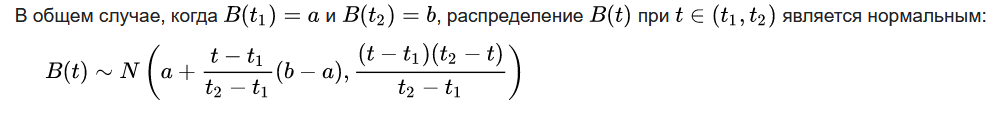

In [2]:
from scipy.stats import norm

In [33]:
def generate_trajectory(t0=0, T=5, N=500, W0=0):
    '''
        Approximates trajectory of Weiner process from t0 to T with initial condition W(t0) = W0
        by computing W(t) in N points (not counting t0). All distances between points equal (T - t0) / N.
        
        Default values: t0=0, T=5, N=500, W0=0
        
        Returns 2-dim array with N+1 columns; 1st column - time t_i; 2nd column - values W(t_i)     
    '''
    deltaT = (T - t0) / N
    C = np.sqrt(deltaT)
    
    traj = np.zeros((2, N + 1))
    traj[0][0] = W0
    traj[1][0] = t0
    for i in range(1, N + 1):
        traj[1][i] = traj[1][i-1] + C * norm.rvs()
        traj[0][i] = traj[0][i-1] + deltaT
    return traj

def add_points(existent_points, new_time_points):
    assert existent_points.shape[0] == 2, 'The first dimension of existent_points must be 2'
    assert new_time_points.ndim == 1, 'new_time_points must be one-dimentional'
    
    ep = existent_points[:, existent_points[0].argsort()]
    
    new_time_points.sort()
    
    tn = ep[0][-1]
    
    for t in new_time_points:
        if t > tn:
            Wtn = ep[1][-1]
            
            xi = norm(0, t - tn).rvs()
            Wt = Wtn + xi
            
            report = [
                '****',
                'W(tn) = ' + str(Wtn),
                'tn = ' + str(tn),
                't = ' + str(t),
                'xi = ' + str(xi)
            ]
            # report = '\n'.join(report)
            
            ep = np.c_[ep, [t, Wt]]
            tn = t
        else:
            # Brownian Bridge between a = W(t_{i - 1}) and b = W(t_i)
            
            i = np.searchsorted(ep[0], t)
            
            t1 = ep[0][i-1]
            t2 = ep[0][i]
            
            if t == t1 or t == t2:
                continue
            
            a = ep[1][i-1]
            b = ep[1][i]
            
            mu = a + (b - a) * (t - t1) / (t2 - t1)
            sigma = (t - t1) * (t2 - t) / (t2 - t1)
            
            Wt = norm(mu, sigma).rvs()
                        
            ep = np.c_[ep[:, :i], [t, Wt], ep[:, i:]]
            
            report = [
                '****',
                'W(t_{i - 1}) = ' + str(a),
                'W(t_i) = ' + str(b),
                'W(t) = ' + str(Wt)
            ]
            report = '\n'.join(report)
            # print(report)
  
    return ep

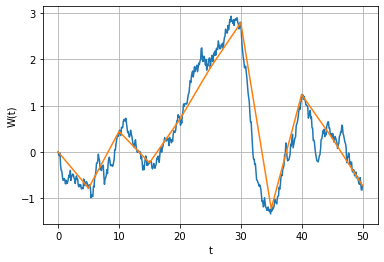

In [19]:
plt.figure(figsize=(6,4))


T = 50
proc1 = generate_trajectory(t0=0, T=T, N=10)


adding_points = np.arange(0, T, 0.1)
proc0 = add_points(proc1, adding_points)

chart = sns.lineplot(x=proc0[0], y=proc0[1])
sns.lineplot(x=proc1[0], y=proc1[1], ax=chart);

chart.set_xlabel('t')
chart.set_ylabel('W(t)')

chart.xaxis.grid()
chart.yaxis.grid()

# 2.5 (второй пункт)

In [5]:
Image(url='https://sun9-33.userapi.com/qPfgZLlX_PH_t6ntMxfjfJ7H-C84sa4HubQxFw/xQ8ewBEnajU.jpg', width=500)

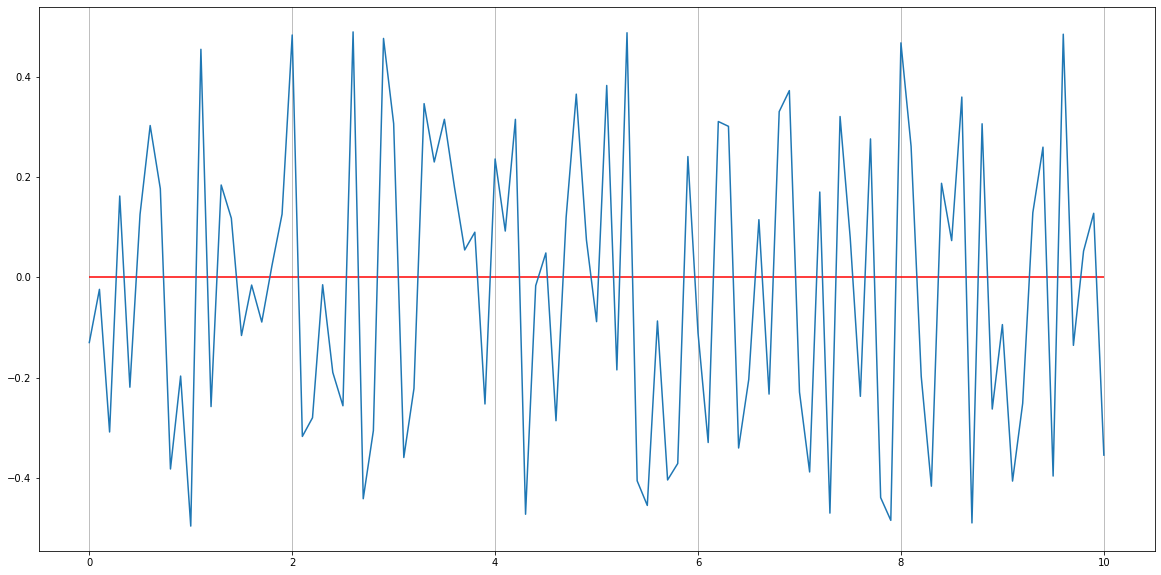

In [61]:
plt.figure(figsize=(20,10))

from scipy.stats import uniform

t0 = 0
T = 10

N = 100
h = T / N

ts = []
gs = []

U_GRN = uniform(-1/2, 1)

for i in range(N+1):
    ts.append(i * h)
    gs.append(U_GRN.rvs())
    
ts = np.array(ts)
gs = np.array(gs)

def F(t):
    i = np.searchsorted(ts, t)

    t_prev = ts[i-1]
    t_next = ts[i]
    
    # t_prev[0] = 0
    
    
    if i == 0:
        return gs[0]
        print(t_prev)
    
    return (t - t_prev) / h * gs[i] + (t_next - t) / h * gs[i-1]

y = [F(t_i) for t_i in ts]
# y = F(ts)
graph = sns.lineplot(x=ts[:], y=y[:]);
graph.hlines([0], 0, T, color='red')
graph.xaxis.grid()

# 3.1
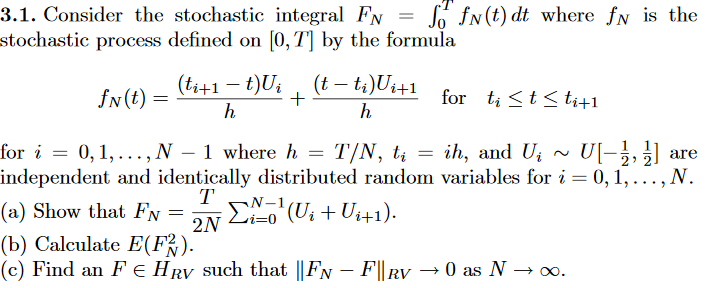
### a)

In [67]:
display(Image(url='https://sun9-18.userapi.com/NPXhAgTogOZqCamUpHzoQAdbkRycnwxB4iC47w/tj7_70J28KM.jpg', width=500))
display(Image(url='https://sun9-27.userapi.com/Q_dijULph7qBi87GPk84kR96DLyaQA1omYf_4g/zQbF37panAw.jpg', width=500))

### b)

In [69]:
display(Image(url='https://sun9-9.userapi.com/O0HR3WcyuXXZLp9j_XKpiIq-VezE3et2qsSSMA/fnJUhH-pz7s.jpg', width=500))
display(Image(url='https://sun9-27.userapi.com/t4xOaKhq3SmCULORrTi6pf49Xcfjn3p8sNieEQ/nhJ9Ij6BS2o.jpg', width=500))

### c)

In [109]:
Image(url='https://sun9-70.userapi.com/ACglorKoEPpiXPw1hmZcmCiL18dmk5sioStxXg/Zq53nNZWA6Q.jpg', width=500)

# 3.3
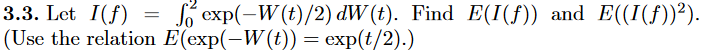

In [110]:
Image(url='https://sun9-66.userapi.com/Jq3eGQ7IGeZyuxRS3dTWxZkwL8pMnTkFIl9hdw/4WBkwxujTMQ.jpg', width=500)

# 3.6
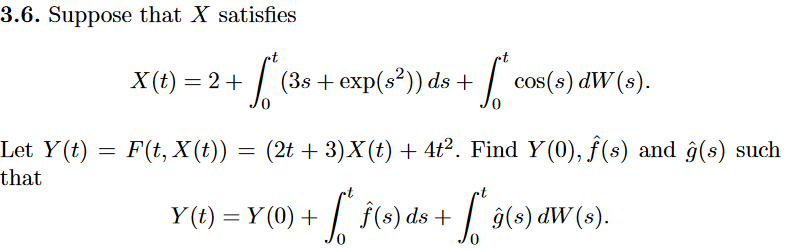

In [3]:
Image(url='https://sun9-73.userapi.com/b8KeesNi-KMhhp-uIcQXNm4IH2u2ahe6gtZjNw/1AAQGyuS9yc.jpg', width=500)

# 3.7
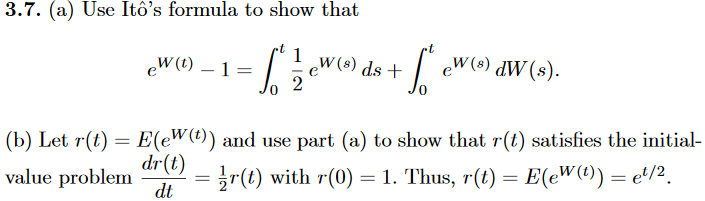

In [7]:
print('a)')
display(Image(url='https://sun9-52.userapi.com/4heHdGRKIUPbDzFi29VrboB4qJYoJV7wrxPS9g/rJJMnQams_8.jpg', width=500))
print('b)')
display(Image(url='https://sun9-37.userapi.com/clf8r2M2cTrDOYLSABRqhSdDk1DM3UnDw3hwwg/me4ErNd7lVA.jpg', width=500))

a)


b)


# 3.10

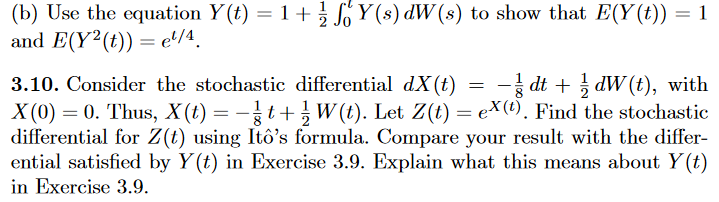

In [9]:
Image(url='https://sun9-38.userapi.com/Ca96MfFN2WD7Iw-ii2nVAApbhRZdOr4cA94peg/S0Qek0krC_k.jpg', width=500)

# Программа для численного поиска моментов от стохастических интегралов

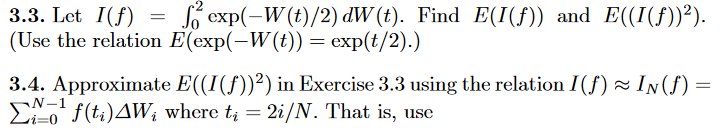
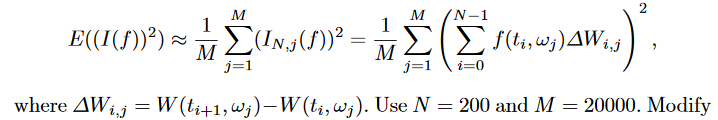

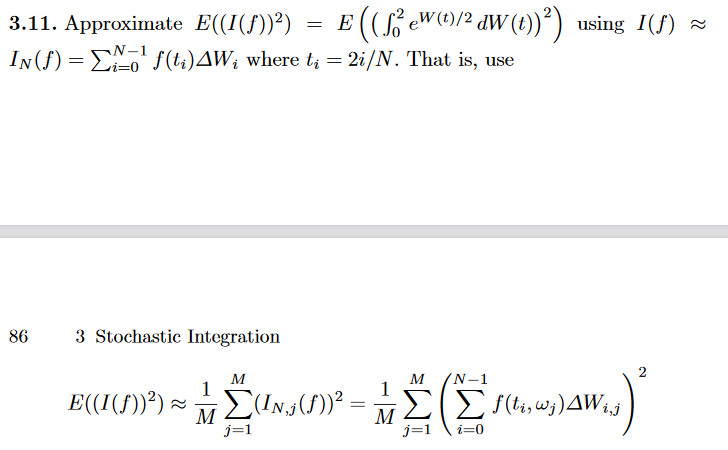

In [140]:
def expectation_of_Ito_integral(f, a, b, k=2, N=100, M=1000):
    '''
        Returns k-th moment of Ito's integral f(t)dW(t) from a to b.
        Uses Monte-Karlo simulation with M trajectories W[i], i = 0 .. M-1.
        Splits each trajectory into N intervals (i.e, 
        for i = 0..M-1 calculates W[i][j] for j=0..N)
    '''
    trajectories = np.zeros((M, N+1))
    
    h = (b - a) / N  # step
    t = np.arange(a, b+h, h)  
    
    F = np.zeros((M, N))   # matrix of function values
    
    for i in tqdm(range(M)):
        trajectories[i] = generate_trajectory(t0=a, T=b, N=N)[1]
        F[i] = f(t[:-1], trajectories[i][:-1])
    
    I_f = np.zeros((M, N)) 
    
    for j in tqdm(range(M)):
        for i in range(N):
            I_f[j][i] = (F[j][i] * (trajectories[j][i+1] - trajectories[j][i]))
        break
            
    # return (I_f.sum(axis=1) ** k).sum() / M, trajectories
    return trajectories

traj100 = expectation_of_Ito_integral(f, 0, 1, k=1, M=3)

x = [i for i in range(len(traj100[0]))]
     


  0%|          | 0/3 [00:00<?, ?it/s]


In [138]:
def f(t, Wt):
    return np.exp(Wt)

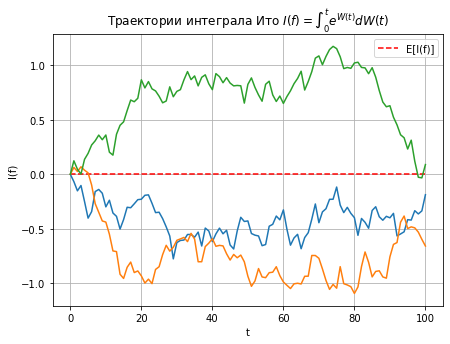

In [174]:
# display(Latex(s))
x = [i for i in range(len(traj100[0]))]
plt.figure(figsize=(7, 5))


graph = sns.lineplot(x=x, y=traj100[0])
sns.lineplot(x=x, y=traj100[1], ax=graph)
sns.lineplot(x=x, y=traj100[2], ax=graph)

graph.hlines([0], x[0], x[-1], linestyles='dashed', color='red', label='E[I(f)]')

graph.set_xlabel('t')
graph.set_ylabel('I(f)');

graph.xaxis.grid()
graph.yaxis.grid()

graph.legend()

# graph.avhline(0)
# graph.set_ylabel_rotation

title = r'Траектории интеграла Ито $I(f) = \int_0^t e^{W(t)}dW(t)$'

graph.set_title(title);

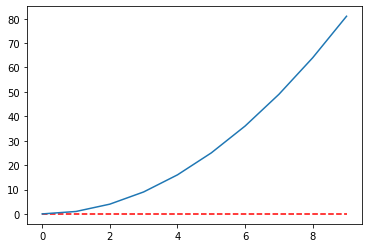

In [163]:
x = [i for i in range(10)]
y = [i**2 for i in x]

graph = sns.lineplot(x=x, y=y);


In [97]:
from IPython.display import Latex

In [152]:
s = "Траектории интеграла" \
    "\n $I(f) = \int\limits_0^1 e^{W(t)}dW(t)$"
Latex(s)

<IPython.core.display.Latex object>

In [150]:
s1 = "Траектории интеграла Ито"
s2 = "\n $I(f) = \int\limits_0^1 e^{W(t)}dW(t)$"

In [151]:
display(s1)
display(Latex(s2))

'Траектории интеграла Ито'

<IPython.core.display.Latex object>

In [21]:
def f(t, Wt):
    return -1/8 * t + 1/2 * Wt

  0%|          | 0/1 [00:00<?, ?it/s]


<AxesSubplot:>

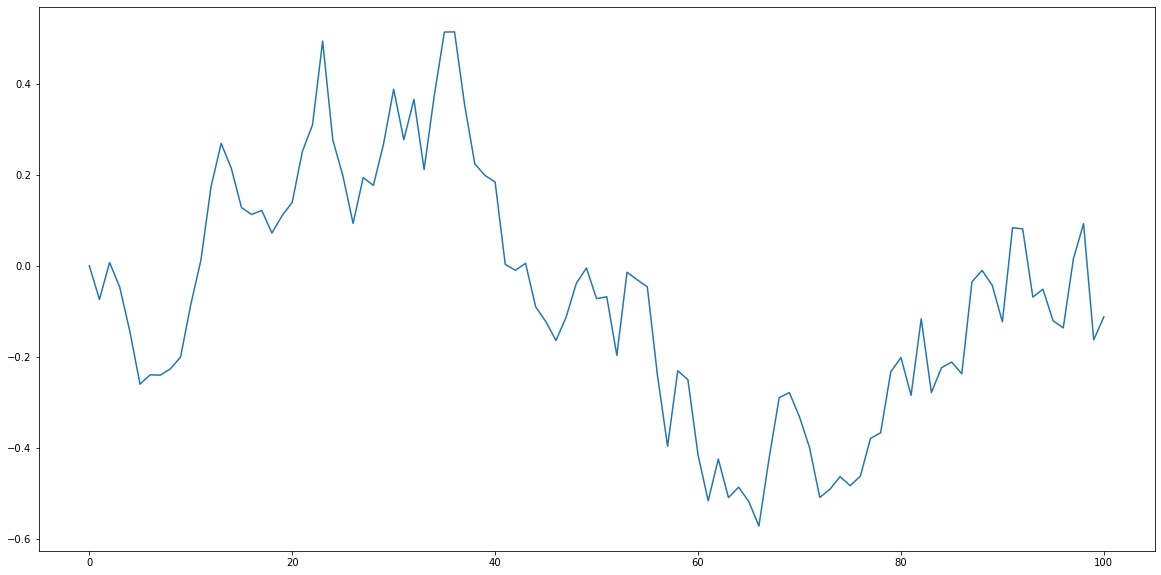

In [123]:
plt.figure(figsize=(20,10))
sns.lineplot(x=[i for i in range(len(traj[0]))], y=traj[0])


In [106]:
def f(t, Wt):  # Совпадает с результатами из 3.11
    return t * Wt
    # return np.exp( - Wt/2)
    
print('Первый момент =', expectation_of_Ito_integral(f, 0, 1, k=1, N=32, M=100000))
print('Второй момент =', expectation_of_Ito_integral(f, 0, 1, k=2, N=32, M=100000))

  0%|          | 105/100000 [00:00<01:35, 1046.46it/s]

Первый момент = -0.00020868348114501213


100%|██████████| 100000/100000 [00:04<00:00, 21228.13it/s]

Второй момент = 0.23441399525445825


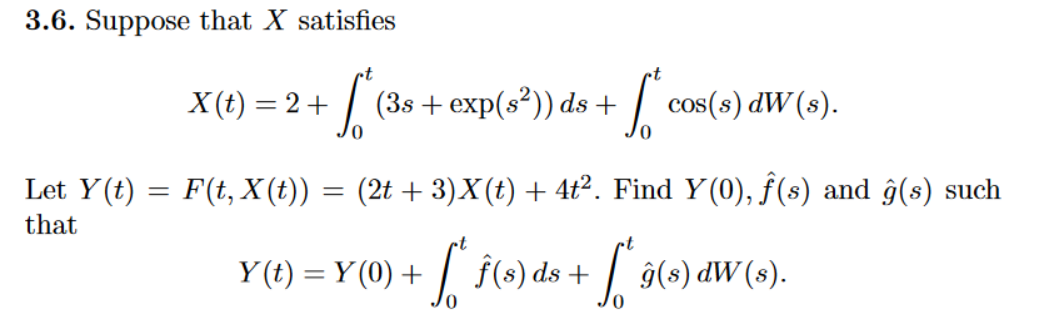